In [36]:
#importing the neccesary libarary
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.datasets
import warnings
warnings.filterwarnings("ignore")

In [7]:
#data collection and preprocessing
df= sklearn.datasets.load_breast_cancer()

In [8]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
#loading the datato data farme
df1= pd.DataFrame(df.data, columns= df.feature_names)

In [10]:
#print first 5 rows
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#print last 5 rows
df1.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [12]:
#adding the target columns to the data frame
df1["label"]= df.target

In [13]:
#print data
df1.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [14]:
#how many columns and rows are there
df1.shape

(569, 31)

In [15]:
#check is there are any null valaue or not
df1.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [16]:
#perform some statistical performance
df1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
#getting some information about data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
#checcking the distribution of traget
df1["label"].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [19]:
# 1 --> Benign
# 0 --> Malignant

In [20]:
df1.groupby("label").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [21]:
#seprating the data X and Y
X= df1.drop(["label"], axis= 1)
Y= df1["label"]

In [22]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [23]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


In [24]:
#data splitting train and test
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 42, test_size= 0.2)

In [25]:
print(X.shape, X_train.shape, Y_train.shape)

(569, 30) (455, 30) (455,)


In [26]:
#standarzed the data
from sklearn.preprocessing import StandardScaler

In [27]:
scaler= StandardScaler()

X_train_std= scaler.fit_transform(X_train)

X_test_std= scaler.transform(X_test)

In [28]:
#building the nwural network

In [29]:
# !pip install tensorflow


In [30]:
#import tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [38]:
#setting up the layer of nwural network
model= keras.Sequential([
    keras.layers.Flatten(input_shape= (30, )),
    keras.layers.Dense(20, activation= "relu"),
    keras.layers.Dense(2, activation= "sigmoid")
])

In [40]:
#compiling the neural network
model.compile(optimizer= "adam",
              loss= "sparse_categorical_crossentropy",
              metrics= ["accuracy"])

In [46]:
#training the neural network
history= model.fit(X_train_std, Y_train, validation_split= 0.1, epochs= 10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7128 - loss: 0.7296 - val_accuracy: 0.8696 - val_loss: 0.4215
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8255 - loss: 0.4722 - val_accuracy: 0.9130 - val_loss: 0.3118
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8852 - loss: 0.3450 - val_accuracy: 0.9348 - val_loss: 0.2475
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9196 - loss: 0.2738 - val_accuracy: 0.9348 - val_loss: 0.2031
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9390 - loss: 0.2301 - val_accuracy: 0.9565 - val_loss: 0.1730
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9390 - loss: 0.1977 - val_accuracy: 0.9565 - val_loss: 0.1523
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9457 - loss: 0.1714 - val_accuracy: 0.9783 - val_loss: 0.1377
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9604 - loss: 0.1545 - val_accuracy: 0.9783 - val_loss

In [50]:
#importing library for visulization
import matplotlib.pyplot as plt
import seaborn as sns

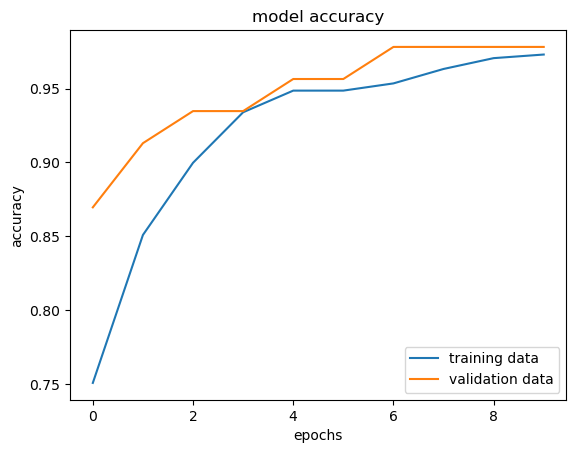

In [60]:
#visulizing acuuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend(["training data", "validation data"], loc= "lower right")
plt.show()

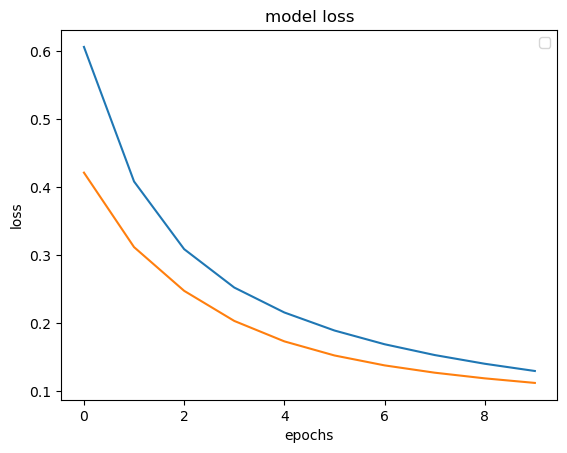

In [64]:
#visulizing loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend(["training data"], ["validation data"], loc= "upper right")
plt.show()

In [66]:
#accuracy of the model on test data
loss, accuracy= model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9589 - loss: 0.1174
0.9649122953414917


In [68]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.46649743 -0.13728933 -0.44421138 -0.48646498  0.28085007  0.04160589
 -0.11146496 -0.26486866  0.41524141  0.13513744 -0.02091509 -0.29323907
 -0.17460869 -0.2072995  -0.01181432 -0.35108921 -0.1810535  -0.24238831
 -0.33731758 -0.0842133  -0.2632354  -0.14784208 -0.33154752 -0.35109337
  0.48001942 -0.09649594 -0.03583041 -0.19435087  0.17275669  0.20372995]


In [74]:
Y_pred= model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [76]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.37896836 0.62865996]


In [78]:
print(X_test_std)

[[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.7925579  -0.05868885
  -0.09467243]]


In [80]:
print(Y_pred)

[[3.78968358e-01 6.28659964e-01]
 [5.56429982e-01 2.23410502e-02]
 [4.45844680e-01 1.30321577e-01]
 [3.04174066e-01 8.50073397e-01]
 [2.36216754e-01 8.71102631e-01]
 [9.22259748e-01 2.91915872e-04]
 [7.98934639e-01 1.16581703e-03]
 [4.84503955e-01 3.13071191e-01]
 [4.67575520e-01 3.94838810e-01]
 [1.58997118e-01 7.74365246e-01]
 [1.70052662e-01 7.05518246e-01]
 [5.03177464e-01 1.82665393e-01]
 [1.38104245e-01 7.84378350e-01]
 [3.94648999e-01 3.09822172e-01]
 [1.34990558e-01 8.70518029e-01]
 [7.15652168e-01 1.10650629e-01]
 [1.31754577e-01 7.62808740e-01]
 [5.85587099e-02 9.33851659e-01]
 [5.44740558e-02 9.82454538e-01]
 [7.40226030e-01 8.54577310e-03]
 [3.32346767e-01 5.55882096e-01]
 [1.93963975e-01 8.14769387e-01]
 [9.19303536e-01 1.00172800e-03]
 [6.57644495e-02 9.36456501e-01]
 [1.45056859e-01 8.23302031e-01]
 [1.86093211e-01 7.04896331e-01]
 [2.11619720e-01 7.57034183e-01]
 [2.15193748e-01 8.41750503e-01]
 [1.50643453e-01 8.22853446e-01]
 [7.65057921e-01 7.70502212e-03]
 [1.712361

In [82]:
#model.predict() is gives the probability of each class for that data point

In [84]:
#argmax function
my_list= [10, 13, 9, 99]
index_max_value= np.argmax(my_list)
print(my_list)
print(index_max_value)

[10, 13, 9, 99]
3


In [86]:
#converting the prediction probability to class labels
Y_pred_labels= [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]


In [90]:
#making prediction system

input= (20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902)

#input data convert into array
input_arr= np.asarray(input)

#reshape the input
input_reshape= input_arr.reshape(1, -1)

#standardizing the input data
input_std= scaler.transform(input_reshape)

pred= model.predict(input_std)
print(pred)

pred_label= [np.argmax(pred)]
print(pred_label)

if pred_label[0] == 0:
    print("the tumor is malignant")
else:
    print("the tumor is benign")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.71406674 0.0250349 ]]
[0]
the tumor is malignant
